### First step : Importation necessary modules and dataset

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [213]:
df = pd.read_excel('business_vancouver.xlsx')

In [214]:
df.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,...,attributes_BYOB,attributes_CoatCheck,attributes_Smoking,attributes_DriveThru,attributes_BYOBCorkage,attributes_Corkage,attributes_RestaurantsCounterService,attributes_AgesAllowed,attributes_DietaryRestrictions,attributes_Open24Hours
0,0,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AvT2mGkdYwU0ghqDfs-OlQ,Tire Town Auto Service,2032 Hastings Street E,Vancouver,BC,V5L 1T8,49.281059,-123.063019,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Yyym58vWvlRPuMCOICWRBw,Shirley's Tape And Shears,102 E 9th St,Vancouver,WA,98660,45.628235,-122.671251,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0b9OJG4DWUqhdLotm_La7Q,Mid Century Modern Home,1041 Kingsway,Vancouver,BC,V5V 3C7,49.253741,-123.082838,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Xg12RikHzyFCgFBApWtcdw,The Golden Dog,"1217 NE 99th St, Ste 107",Vancouver,WA,98665,45.692591,-122.658644,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1) Data Cleaning

In [215]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14505 entries, 0 to 14504
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             14505 non-null  int64  
 1   business_id                            14505 non-null  object 
 2   name                                   14505 non-null  object 
 3   address                                14175 non-null  object 
 4   city                                   14505 non-null  object 
 5   state                                  14505 non-null  object 
 6   postal_code                            14457 non-null  object 
 7   latitude                               14505 non-null  float64
 8   longitude                              14505 non-null  float64
 9   stars                                  14505 non-null  float64
 10  review_count                           14505 non-null  int64  
 11  is

(         Unnamed: 0      latitude     longitude         stars  review_count  \
 count  14505.000000  14505.000000  14505.000000  14505.000000  14505.000000   
 mean    7252.000000     48.514449   -123.005929      3.606239     39.096312   
 std     4187.377162      1.475502      0.214933      0.849316     76.811995   
 min        0.000000     45.478149   -123.289089      1.000000      5.000000   
 25%     3626.000000     49.231021   -123.127247      3.000000      8.000000   
 50%     7252.000000     49.265763   -123.106905      3.500000     15.000000   
 75%    10878.000000     49.281512   -123.044490      4.000000     38.000000   
 max    14504.000000     49.490000   -122.472949      5.000000   2302.000000   
 
             is_open  attributes_RestaurantsPriceRange2  
 count  14505.000000                        9828.000000  
 mean       0.734712                           1.872812  
 std        0.441502                           0.666167  
 min        0.000000                          

## Partie 1

In [216]:
# Filter categories with “Restaurant” only
df_restaurants = df[df['categories'].str.contains('Restaurant', na=False)]



In [217]:

print(df.columns)
hours_columns = ["hours_Monday", "hours_Tuesday", "hours_Wednesday",
                "hours_Thursday", "hours_Friday", "hours_Saturday", "hours_Sunday"
                ]

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes_RestaurantsTableService', 'attributes_WiFi',
       'attributes_BikeParking', 'attributes_BusinessParking',
       'attributes_BusinessAcceptsCreditCards',
       'attributes_RestaurantsReservations', 'attributes_WheelchairAccessible',
       'attributes_Caters', 'attributes_OutdoorSeating',
       'attributes_RestaurantsGoodForGroups', 'attributes_HappyHour',
       'attributes_BusinessAcceptsBitcoin',
       'attributes_RestaurantsPriceRange2', 'attributes_Ambience',
       'attributes_HasTV', 'attributes_Alcohol', 'attributes_GoodForMeal',
       'attributes_DogsAllowed', 'attributes_RestaurantsTakeOut',
       'attributes_NoiseLevel', 'attributes_RestaurantsAttire',
       'attributes_RestaurantsDelivery', 'categories', 'hours_Monday',
       'hours_Tuesday', 'hours_Wednesday', 'hours_Thursday', 'hours_Friday',

In [218]:
# Function for calculating opening time from time slots 
def calculate_duration(hours_range):
    if pd.isna(hours_range):  
        return 0
    try:
        start, end = hours_range.split('-')
        start_time = pd.to_datetime(start, format='%H:%M')
        end_time = pd.to_datetime(end, format='%H:%M')
        duration = (end_time - start_time).seconds / 3600 
        return duration if duration > 0 else duration + 24  
    except Exception:
        return 0  

for column in hours_columns:
    df_restaurants[f"{column}_duration"] = df_restaurants[column].apply(calculate_duration)


C:\Users\kilia\AppData\Local\Temp\ipykernel_21584\761379372.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants[f"{column}_duration"] = df_restaurants[column].apply(calculate_duration)
C:\Users\kilia\AppData\Local\Temp\ipykernel_21584\761379372.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants[f"{column}_duration"] = df_restaurants[column].apply(calculate_duration)
C:\Users\kilia\AppData\Local\Temp\ipykernel_21584\761379372.py:15: SettingWithCopyWarning: 
A value is trying 

## Première partie

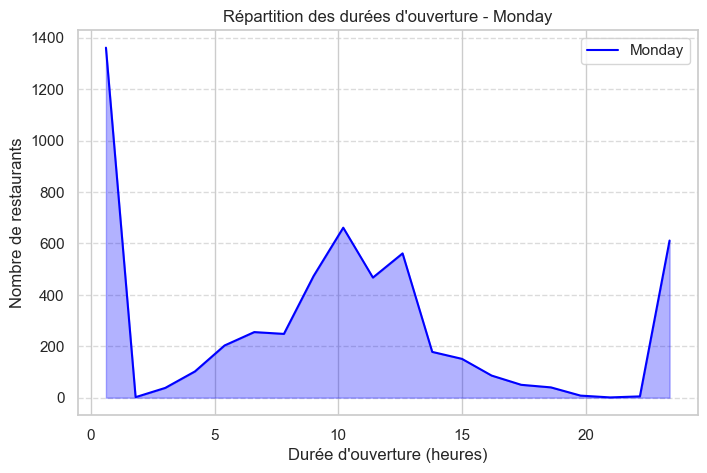

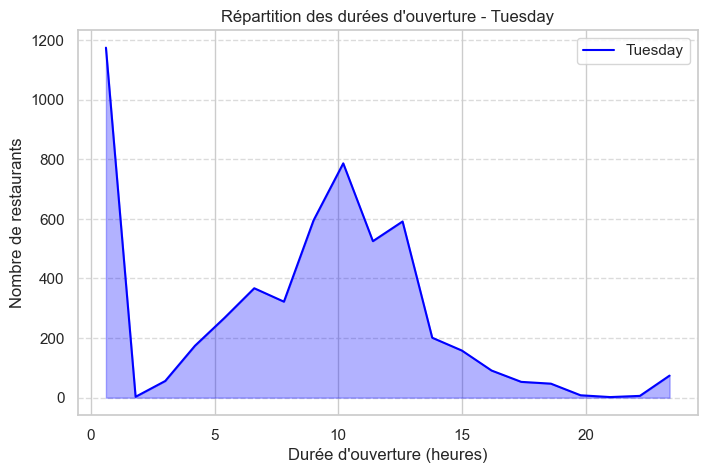

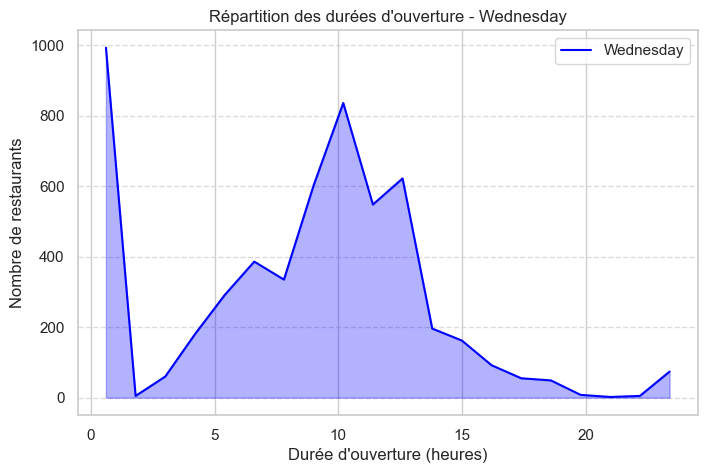

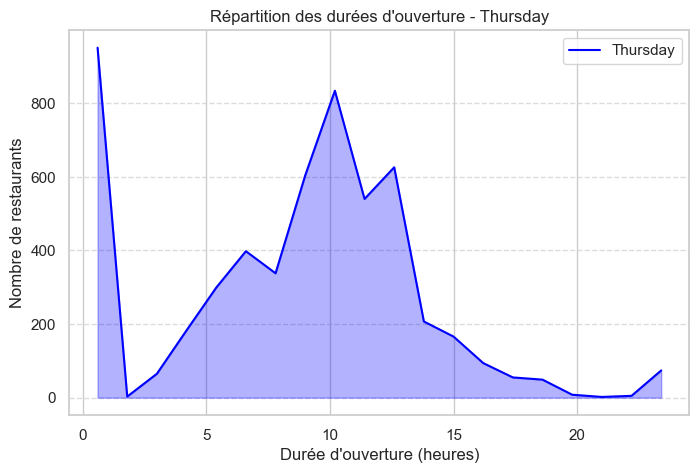

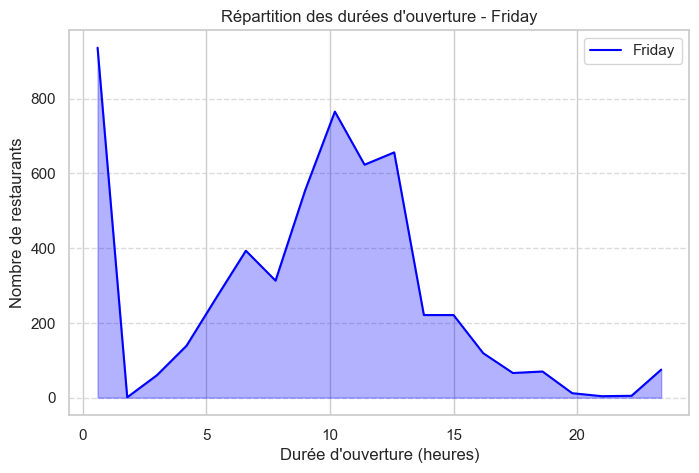

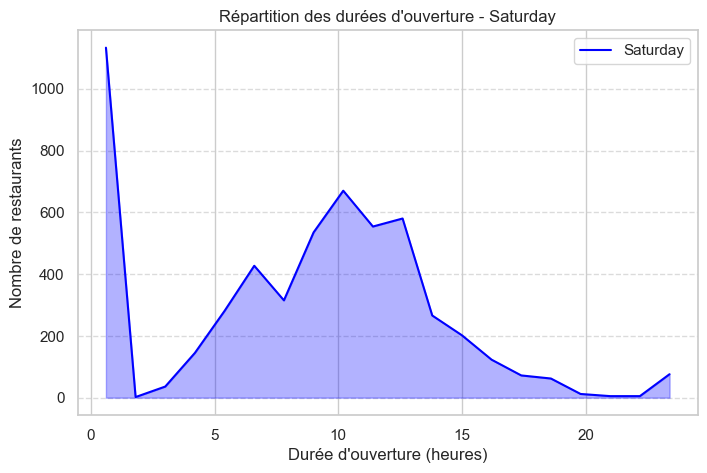

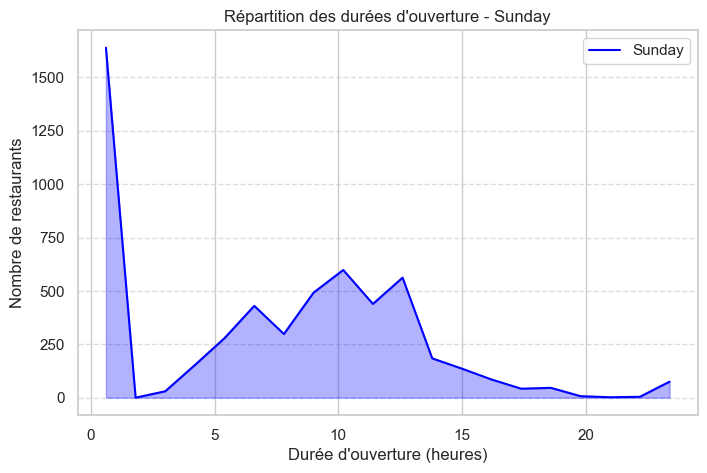

In [219]:

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot the breakdown for each day of the week
for day in days:
    column = f"hours_{day}_duration"
    plt.figure(figsize=(8, 5))
    
    # Histogram of data to obtain distribution
    counts, bins = np.histogram(df_restaurants[column], bins=20)
    bin_centers = (bins[:-1] + bins[1:]) / 2  # Centres des bins
    
    # Line drawing and filling
    plt.plot(bin_centers, counts, color='blue', label=f"{day}")
    plt.fill_between(bin_centers, counts, color='blue', alpha=0.3)
    
    plt.title(f"Répartition des durées d'ouverture - {day}")
    plt.xlabel("Durée d'ouverture (heures)")
    plt.ylabel("Nombre de restaurants")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()


## Deuxième partie

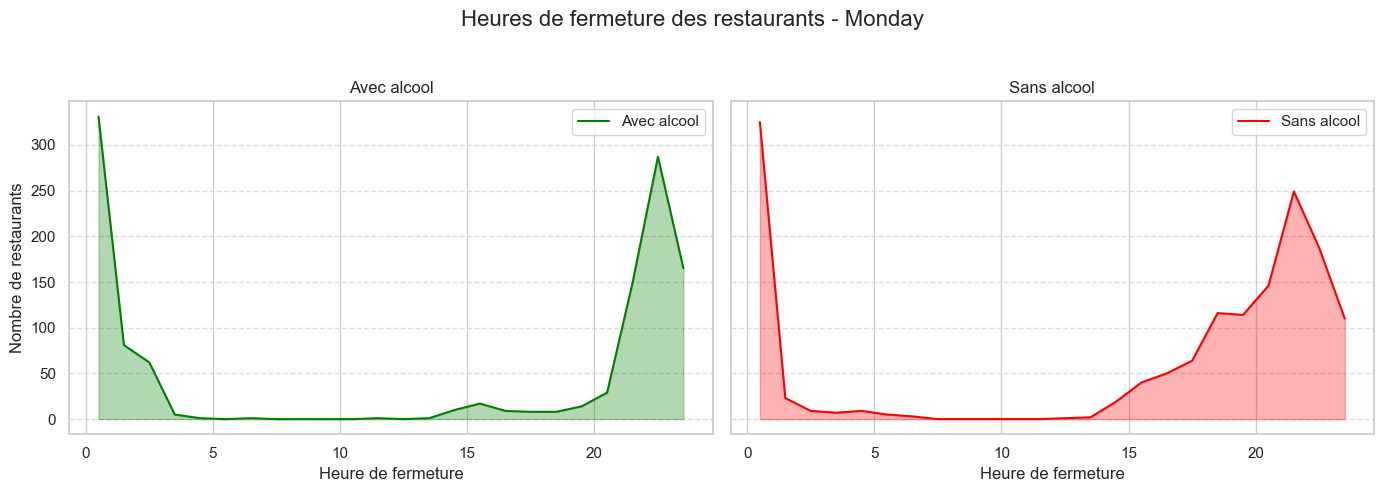

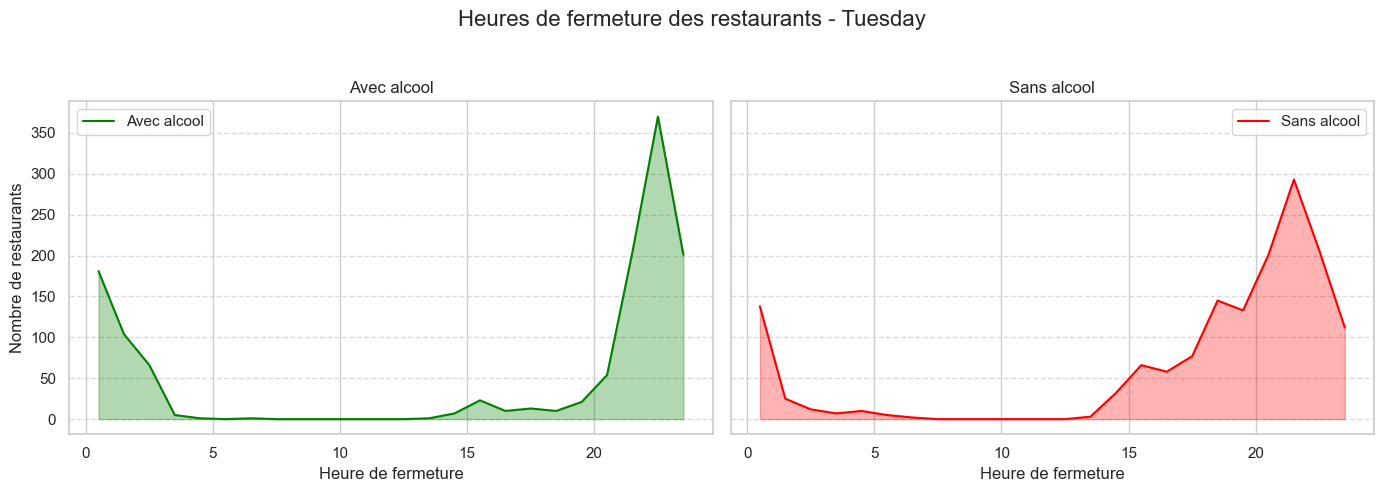

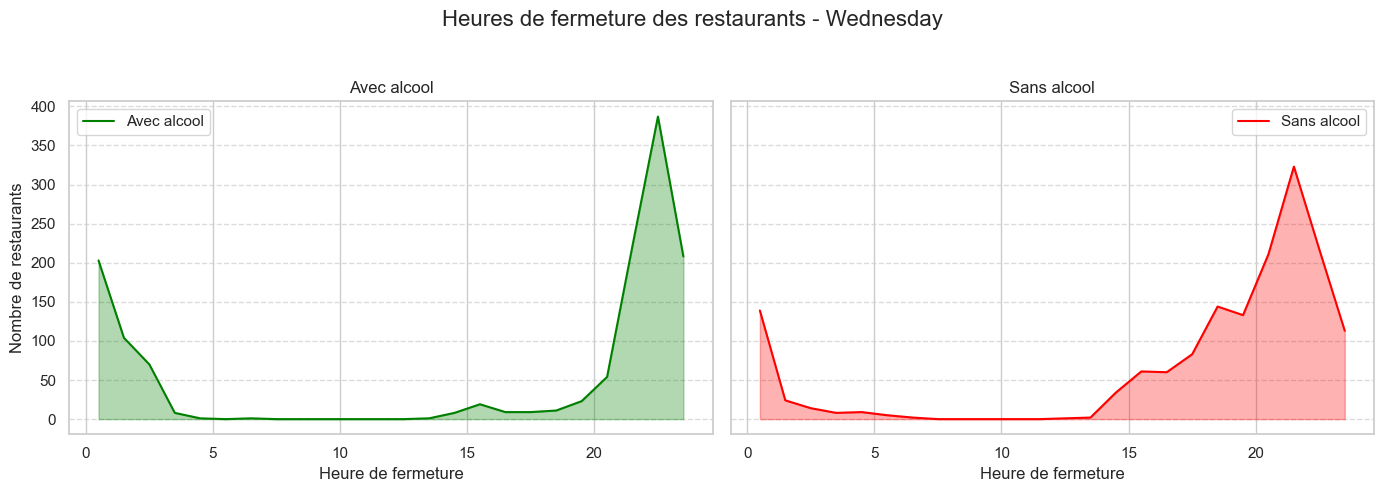

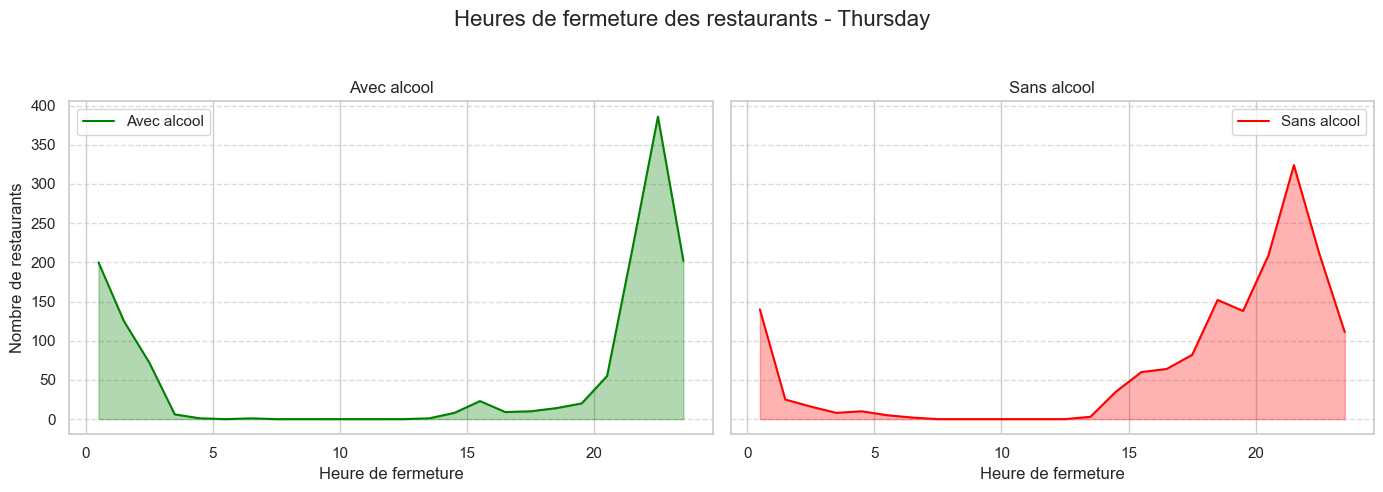

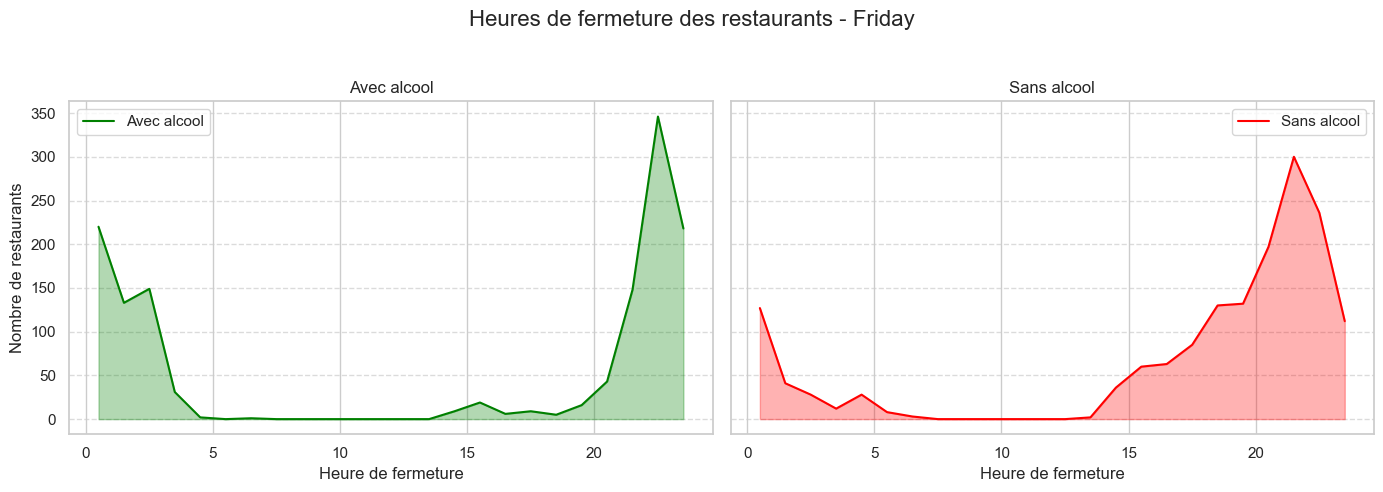

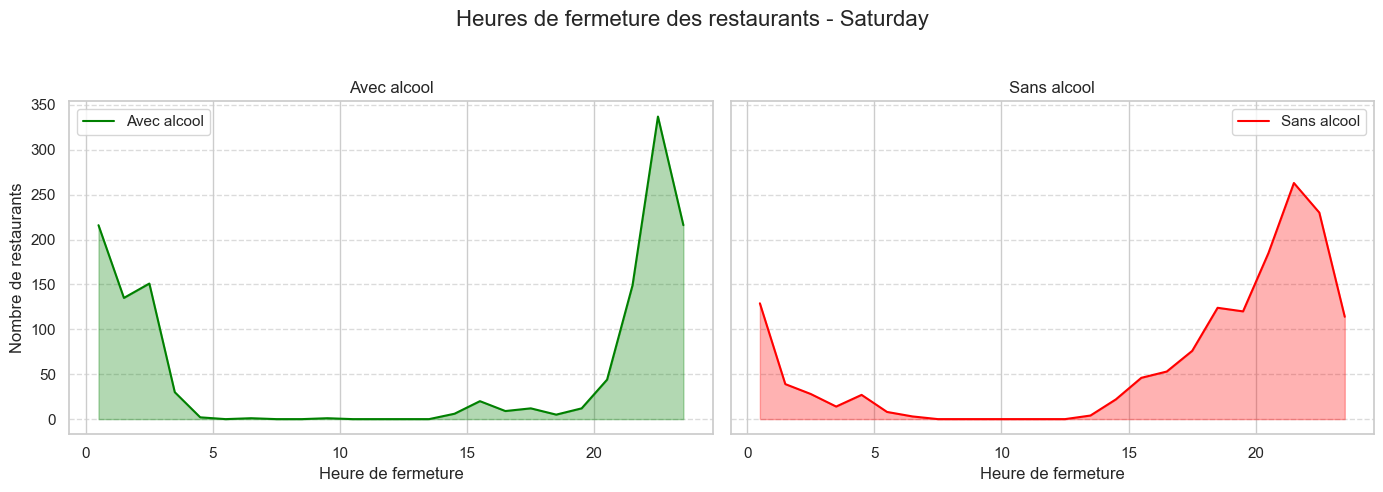

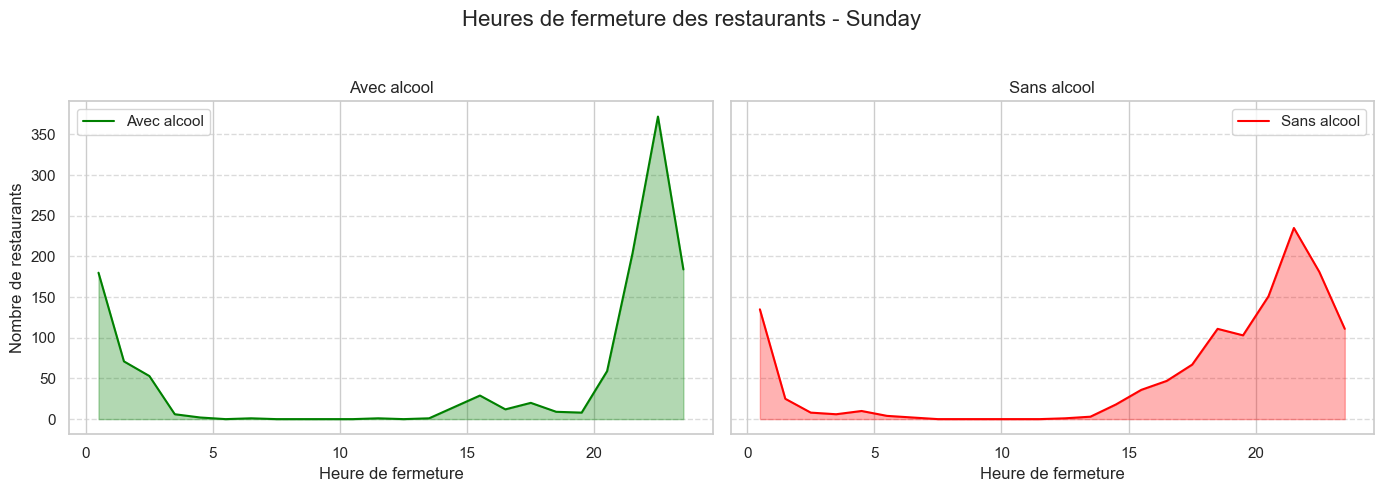

In [220]:
# Filter restaurants by 'Alcohol' attribute
with_alcohol = df_restaurants[
    df_restaurants['attributes_Alcohol'].str.contains('full_bar', na=False)
]
without_alcohol = df_restaurants[
    df_restaurants['attributes_Alcohol'].str.contains('none', na=False)
]

# Extract closing times for each day
closing_hours = {}
for day in days:
    column = f"hours_{day}"
    closing_hours[f"{day}_with_alcohol"] = with_alcohol[column].dropna().apply(
        lambda x: int(x.split('-')[1].split(':')[0]) if '-' in x else None
    )
    closing_hours[f"{day}_without_alcohol"] = without_alcohol[column].dropna().apply(
        lambda x: int(x.split('-')[1].split(':')[0]) if '-' in x else None
    )

# Plot day-by-day comparisons with two side-by-side graphs
for day in days:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
    fig.suptitle(f"Heures de fermeture des restaurants - {day}", fontsize=16)
    
    with_alcohol_counts, bins = np.histogram(closing_hours[f"{day}_with_alcohol"], bins=range(25))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    axes[0].plot(bin_centers, with_alcohol_counts, color='green', label="Avec alcool")
    axes[0].fill_between(bin_centers, with_alcohol_counts, color='green', alpha=0.3)
    axes[0].set_title("Avec alcool")
    axes[0].set_xlabel("Heure de fermeture")
    axes[0].set_ylabel("Nombre de restaurants")
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0].legend()
    
    without_alcohol_counts, bins = np.histogram(closing_hours[f"{day}_without_alcohol"], bins=range(25))
    bin_centers = (bins[:-1] + bins[1:]) / 2
    axes[1].plot(bin_centers, without_alcohol_counts, color='red', label="Sans alcool")
    axes[1].fill_between(bin_centers, without_alcohol_counts, color='red', alpha=0.3)
    axes[1].set_title("Sans alcool")
    axes[1].set_xlabel("Heure de fermeture")
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1].legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste la mise en page pour le titre
    plt.show()



## Troisième partie

C:\Users\kilia\AppData\Local\Temp\ipykernel_21584\3699719650.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_vancouver['distance_to_center'] = restaurants_vancouver.apply(


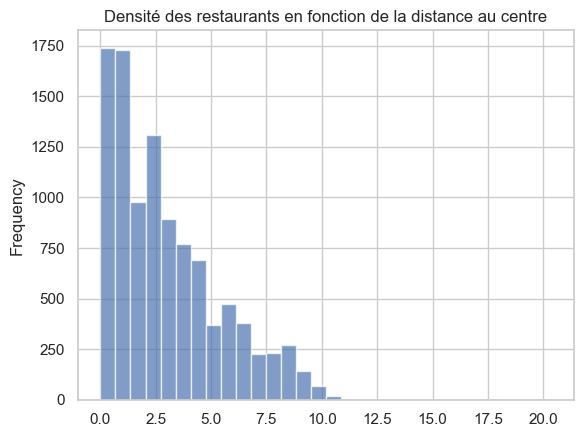

In [221]:
import numpy as np

# Set the approximate coordinates of the Vancouver center
vancouver_center = {'latitude': 49.2827, 'longitude': -123.1207}

# Filter restaurants located in Vancouver (BC, Canada)
restaurants_vancouver = df[(df['city'] == 'Vancouver') & (df['state'] == 'BC')]

# Function to calculate geographic distance (Haversine)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate the distance to the center for each restaurant
restaurants_vancouver['distance_to_center'] = restaurants_vancouver.apply(
    lambda row: haversine(row['latitude'], row['longitude'], vancouver_center['latitude'], vancouver_center['longitude']),
    axis=1
)

restaurants_vancouver['distance_to_center'].plot.hist(bins=30, alpha=0.7, title="Densité des restaurants en fonction de la distance au centre")
plt.show()